<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DECRIPCION DEL PROBLEMA

ENTRADA: una matriz de keys de busqueda y una matriz de conteos de frcuencia.

SALIDA: Costo total de todas las búsquedas más pequeño posible

# DESCRIPCION DEL ALGORITMO


El algoritmo utila una funcion pra calcular el costo del árbol de búsqueda binario óptimo:


1.   Comprueba casos base (un solo elemnto o ninguno)
2.   utilizando una funcion propia obtiene la suma de los elemntos del arreglo de freq desde i a j

1.   inicializa un valor minimo
2.   uno por uno va considerando todos los elemntos como raiz y enceuntra recursivamente el costo del BTS y lo va comparando con el valor minimo y remplazando lo de ser necesario

1.   Y termin aretornando el valor minimo mas la suma de los elemntos del arreglo


Por ultimo la funcion main se encarga de ordenar el arreglo de keys de manera creciente y reorganizar el arreglo de frecuencias segun corresponda utiliando insertionSort para haci pasar el arreglo de frecuencias a la funcion mencionada anteriormente







In [57]:
def insertionSort(arr,a):
  
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
  
        key = arr[i]
        key2 = a[i]
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                a[j + 1] = a[j]
                j -= 1
        arr[j + 1] = key
        a[j + 1] = key2
  

In [58]:
#RECURSIVO
def optimalSearchTree(keys, freq, n):

    insertionSort(keys,freq)
    return optCost(freq, 0, n - 1)
 
# A recursive function to calculate
# cost of optimal binary search tree
def optCost(freq, i, j):
    
    global cont
    cont+=1
    # Base cases
    if j < i:     # no elements in this subarray
        return 0
    if j == i:     # one element in this subarray
        return freq[i]
     
    # Get sum of freq[i], freq[i+1], ... freq[j]
    fsum = Sum(freq, i, j)
     
    # Initialize minimum value
    Min = 999999999999
     
    # One by one consider all elements as
    # root and recursively find cost of
    # the BST, compare the cost with min
    # and update min if needed
    for r in range(i, j + 1):
        cost = (optCost(freq, i, r - 1) +
                optCost(freq, r + 1, j))
        if cost < Min:
            Min = cost
     
    # Return minimum value
    return Min + fsum
def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

In [59]:
keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)
cont=0
print("Cost of Optimal BST is",optimalSearchTree(keys, freq, n))
print(cont)

Cost of Optimal BST is 142
15


In [54]:
#DINAMICO
 
INT_MAX = 2147483647
 
""" A Dynamic Programming based function that
calculates minimum cost of a Binary Search Tree. """
def optimalSearchTreeD(keys, freq, n):
 
    """ Create an auxiliary 2D matrix to store
        results of subproblems """
    cost = [[0 for x in range(n)]
               for y in range(n)]
 
    """ cost[i][j] = Optimal cost of binary search
    tree that can be formed from keys[i] to keys[j].
    cost[0][n-1] will store the resultant cost """
 
    # For a single key, cost is equal to
    # frequency of the key
    for i in range(n):
        cost[i][i] = freq[i]
 
    # Now we need to consider chains of
    # length 2, 3, ... . L is chain length.
    for L in range(2, n + 1):
     
        # i is row number in cost
        for i in range(n - L + 2):
             
            # Get column number j from row number
            # i and chain length L
            j = i + L - 1
            off_set_sum = sum(freq, i, j)
            if i >= n or j >= n:
                break
            cost[i][j] = INT_MAX
             
            # Try making all keys in interval
            # keys[i..j] as root
            for r in range(i, j + 1):
                 
                # c = cost when keys[r] becomes root
                # of this subtree
                c = 0
                if (r > i):
                    c += cost[i][r - 1]
                if (r < j):
                    c += cost[r + 1][j]
                c += off_set_sum
                if (c < cost[i][j]):
                    cost[i][j] = c
    return cost[0][n - 1]
 
 
# A utility function to get sum of
# array elements freq[i] to freq[j]
def sum(freq, i, j):
 
    s = 0
    for k in range(i, j+1):
        s = s+ freq[k]
    return s
     
    

función matemática para describir la cantidad de subproblemas que se deben resolver en función del tamaño de entrada
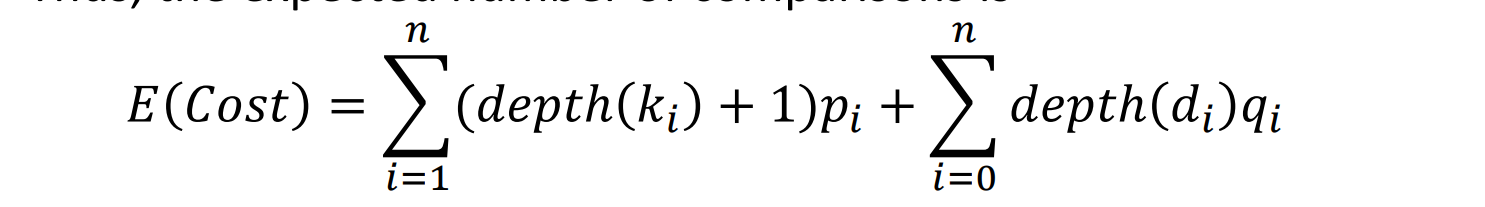

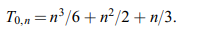


Cada subproblema posee un tiempo de ejecucion de O(n^k+2) y el algoritmo posee un tiempo de ejecucion de 𝑂(𝑛^3), ya que necesitamos calcular 𝑂(𝑛^2) entradas y nosotros
necesita 𝑂(𝑛) tiempo para calcular cada entrada.

# Complejidad espacial
la complejidad espacial es O(n^2) ya que nesesitamos almacenar O(n^2) valores en 3 matrices para un par de indices i,j donde
𝑗 ≥ 𝑖 − 1.

In [31]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

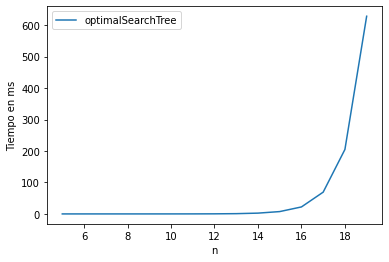

In [47]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]
for n in range(5,20):
  keys, p, q=optimal_bst_instance_generator(n)
  t = repeat(setup="from __main__ import optimalSearchTree", stmt=f"optimalSearchTree({keys},{p},{n})", repeat=1, number=2)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["optimalSearchTree"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Segun los resultados del grafico el tiempo de ejecucion experimental del algoritmo aumenta de una manera abrupta cuando el arreglo supera el tamaño 16 aumentado su tiempo de ejecucion de entre 0 y 100 hasta casi 200 ms 